In [1]:
# sys — allows Python to interact with the system, especially things like the module search path.
# os — used for path handling (important for loading files and scripts).
# pandas (pd) — a powerful library for loading, cleaning, transforming, and analyzing data.
# datetime — handles date and time values (not used here but often part of data pipelines).

In [22]:
import sys
import os
import pandas as pd
from datetime import datetime

In [13]:
# Add the '../scripts' directory to the Python module search path.
# This allows us to import modules from that directory, 
# facilitating better organization of our code and access to shared scripts.
sys.path.append(os.path.abspath('../scripts'))

In [14]:
# We import two custom Python files you created:
# data_processing.py → handles loading, encoding, scaling
# model.py → handles model training, evaluation, plotting
# This maintains modularity and clean project structure.

import data_processing as dp
import model as m

### Loading and cleaning data

In [ ]:
# Ensure dp is imported (handles out-of-order execution)

if 'dp' not in globals():

    import sys, os

    sys.path.append(os.path.abspath('../scripts'))

    import data_processing as dp



filepath = '../data/insurance.txt'  # update if your file lives elsewhere (auto-detects delimiter)

data = dp.load_and_clean_data(filepath)

data.head()

In [ ]:
# If the raw file has generic headers, align them to the expected schema

expected_columns = [

    'UnderwrittenCoverID','PolicyID','TransactionMonth','IsVATRegistered','Citizenship','LegalType','Title','Language','Bank','AccountType','MaritalStatus','Gender','Country','Province','PostalCode','MainCrestaZone','SubCrestaZone',

    'ItemType','mmcode','VehicleType','RegistrationYear','make','Model','Cylinders','cubiccapacity','kilowatts','bodytype','NumberOfDoors','VehicleIntroDate','CustomValueEstimate','AlarmImmobiliser','TrackingDevice','CapitalOutstanding','NewVehicle','WrittenOff','Rebuilt','Converted','CrossBorder','NumberOfVehiclesInFleet',

    'SumInsured','TermFrequency','CalculatedPremiumPerTerm','ExcessSelected','CoverCategory','CoverType','CoverGroup','Section','Product','StatutoryClass','StatutoryRiskType','TotalPremium','TotalClaims'

]



if data.shape[1] == len(expected_columns):

    data.columns = expected_columns

else:

    print(f"Column count mismatch: data has {data.shape[1]} cols, expected {len(expected_columns)}. Skipping rename.")



data.head()

### Data quality snapshot

- Inspect shape, dtypes, and missingness before feature engineering.

- Key business fields include premiums/claims, policy/client/location/vehicle attributes, and transaction month for temporal slicing.

In [16]:
# Inspect schema, missingness, and summary stats

print("Shape:", data.shape)

print("\nDtypes:\n", data.dtypes)

print("\nMissing values per column:\n", data.isnull().sum())



summary = data.describe(include='all')

summary

Shape: (1000098, 75)

Dtypes:
 Und                                               object
rwritt                                            object
nCov                                              object
rID|PolicyID|TransactionMonth|IsVATR              object
gist                                              object
                                                  ...   
|Cov                                             float64
rGroup|S                                         float64
ction|Product|StatutoryClass|StatutoryRiskTyp    float64
|TotalPr                                         float64
mium|TotalClaims                                 float64
Length: 75, dtype: object
Und                                               object
rwritt                                            object
nCov                                              object
rID|PolicyID|TransactionMonth|IsVATR              object
gist                                              object
                               

,Und,rwritt,nCov,rID|PolicyID|TransactionMonth|IsVATR,gist,r,d|Citiz,nship|L,galTyp,|Titl,...,ct,d|Cov,rCat,gory|Cov,rTyp,|Cov,rGroup|S,ction|Product|StatutoryClass|StatutoryRiskTyp,|TotalPr,mium|TotalClaims
count,1000098,1000098,1000098,1000098,1000098,1000098,996564,996805,998826,1000032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,981812,96,41,18,28,490,750,728,642,956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,92857|5279|2015-08-01 00:00:00|Fals,| |Individual|Mr|English|First National Bank|...,nt account|Not sp,cifi,cifi,cifi,cifi,xc,pt Pr,ng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,123947,320969,412674,548244,404906,235663,107725,107725,123787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate distributions

Numeric distributions for premiums, claims, sum insured, and vehicle power measures.

In [21]:
import matplotlib.pyplot as plt



numeric_candidates = [

    'TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm',

    'CapitalOutstanding', 'Cubiccapacity', 'Kilowatts'

]

numeric_cols = [c for c in numeric_candidates if c in data.columns]



if numeric_cols:

    n_cols = min(3, len(numeric_cols))

    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows))

    axes = axes.flatten() if hasattr(axes, "flatten") else [axes]

    for ax, col in zip(axes, numeric_cols):

        ax.hist(data[col].dropna(), bins=30, color='steelblue', edgecolor='white')

        ax.set_title(f"Distribution of {col}")

    for ax in axes[len(numeric_cols):]:

        ax.set_visible(False)

    plt.tight_layout()

    plt.show()

else:

    print("No expected numeric columns found; inspect data.head() to choose columns.")

No expected numeric columns found; inspect data.head() to choose columns.


### Categorical mix

Top categories for policy, product, geography, and vehicle attributes.

In [18]:
categorical_candidates = [

    'Product', 'CoverType', 'CoverCategory', 'Province', 'MainCrestaZone',

    'VehicleType', 'Make', 'Model', 'StatutoryClass'

]

cat_cols = [c for c in categorical_candidates if c in data.columns]



if cat_cols:

    for col in cat_cols:

        print(f"\nTop categories for {col}:")

        display(data[col].value_counts(dropna=False).head(10))

else:

    print("No expected categorical columns found; inspect data.head() to choose columns.")

No expected categorical columns found; inspect data.head() to choose columns.


### Outlier check

Box plots for premiums/claims/sum insured.

In [19]:
box_cols = [c for c in ['TotalPremium', 'TotalClaims', 'SumInsured'] if c in data.columns]



if box_cols:

    n_cols = min(3, len(box_cols))

    n_rows = (len(box_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

    axes = axes.flatten() if hasattr(axes, "flatten") else [axes]

    for ax, col in zip(axes, box_cols):

        ax.boxplot(data[col].dropna(), vert=True)

        ax.set_title(f"Boxplot: {col}")

    for ax in axes[len(box_cols):]:

        ax.set_visible(False)

    plt.tight_layout()

    plt.show()

else:

    print("No expected numeric columns for boxplots; inspect data.head().")

No expected numeric columns for boxplots; inspect data.head().


### Bivariate insights

Claims vs premiums/sum insured, and monthly aggregates.

In [20]:
import numpy as np



# Parse transaction month if present

if 'TransactionMonth' in data.columns:

    data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'], errors='coerce')



# Loss ratio helper

has_prem_claims = {'TotalPremium', 'TotalClaims'}.issubset(set(data.columns))

if has_prem_claims:

    df_lr = data.loc[data['TotalPremium'] > 0, ['TotalPremium', 'TotalClaims']].copy()

    df_lr['loss_ratio'] = df_lr['TotalClaims'] / df_lr['TotalPremium']

else:

    df_lr = None



plots_made = False

if has_prem_claims:

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].scatter(df_lr['TotalPremium'], df_lr['TotalClaims'], alpha=0.4, color='teal')

    axes[0].set_xlabel('TotalPremium')

    axes[0].set_ylabel('TotalClaims')

    axes[0].set_title('Claims vs Premium')



    axes[1].hist(df_lr['loss_ratio'].dropna(), bins=40, color='orangered', edgecolor='white')

    axes[1].set_title('Loss ratio distribution (claims/premium)')

    axes[1].set_xlabel('Loss ratio')

    plt.tight_layout()

    plt.show()

    plots_made = True



# Monthly aggregates

if ('TransactionMonth' in data.columns) and has_prem_claims:

    monthly = data.dropna(subset=['TransactionMonth']).copy()

    monthly = monthly.groupby(pd.Grouper(key='TransactionMonth', freq='M')).agg({

        'TotalPremium': 'sum',

        'TotalClaims': 'sum'

    })

    monthly['loss_ratio'] = monthly['TotalClaims'] / monthly['TotalPremium'].replace(0, np.nan)

    monthly = monthly.dropna(subset=['loss_ratio'])



    monthly[['TotalPremium', 'TotalClaims']].plot(figsize=(10, 4), title='Monthly premium vs claims')

    plt.show()

    monthly['loss_ratio'].plot(figsize=(10, 3), title='Monthly loss ratio')

    plt.axhline(1.0, color='red', linestyle='--', linewidth=1)

    plt.show()

    plots_made = True



if not plots_made:

    print("Not enough columns to build bivariate plots; check data.head() and adjust feature lists.")



if df_lr is not None:

    df_lr.describe(include='all')

Not enough columns to build bivariate plots; check data.head() and adjust feature lists.


**Key EDA notes (run once data is loaded):**

- Review missingness/dtypes to guide cleaning (dates, categoricals, numerics).

- Inspect distributions of premiums/claims/sum insured; note skew/outliers.

- Check top categories for product/cover/geography/vehicle to spot dominance or sparsity.

- Use loss ratio (TotalClaims / TotalPremium where premium > 0) and monthly aggregates for performance slices.

- Adjust column lists if your file uses different names or additional measures.

### ENCODING & SCALING

🔹 What is encoding?

Machine learning models cannot understand text (categorical data),
so we convert them into numbers.

🔹 Label Encoding

Converts each category → a number

Example: "male"=0, "female"=1

Why?

Most ML models need numerical inputs.

In [15]:
columns_label = ['sex', 'smoker', 'region']
columns_onehot = ['sex', 'smoker', 'region', 'children']

df_label = dp.encoder('labelEncoder', data, columns_label, columns_onehot)
df_label

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


🔹 What is scaling?

Scaling changes feature values into a smaller, consistent range.

🔹 MinMaxScaler

Transforms values to a range 0 → 1.

Example:
If charges = 30,000 and max = 60,000 → scaled = 0.5

Why?

Some models (like linear regression, XGBoost) perform better when numeric features are normalized.

In [16]:
columns_scaler = ['charges']
df_scaled = dp.scaler('minMaxScaler', df_label, columns_scaler)
df_scaled

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,0.251611
1,18,1,33.770,1,0,2,0.009636
2,28,1,33.000,3,0,2,0.053115
3,33,1,22.705,0,0,1,0.333010
4,32,1,28.880,0,0,1,0.043816
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0.151299
1334,18,0,31.920,0,0,0,0.017305
1335,18,0,36.850,0,0,2,0.008108
1336,21,0,25.800,0,0,3,0.014144


### TRAIN-TEST SPLIT

X = all independent variables (features).

y = target variable (charges).

Train-test split:

Train set → used to train the model

Test set → used to evaluate the model on unseen data

This prevents overfitting.

In [17]:
X = df_scaled.drop('charges', axis=1)
y = df_scaled['charges']

X_train, X_test, y_train, y_test = m.split_data(X, y)
X_train


,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,0
968,21,1,25.745,2,0,0
599,52,0,37.525,2,0,1
170,63,1,41.470,0,0,2
275,47,0,26.600,2,0,0
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,0
1131,27,1,45.900,2,0,3
1295,20,1,22.000,1,0,3
861,38,0,28.000,3,0,3


### TRAINING MODELS

We train four models:

Linear Regression → simplest model, finds a straight-line relationship

Decision Tree Regressor → splits data based on rules

Random Forest Regressor → many trees averaged together

XGBoost Regressor → powerful boosting algorithm, great accuracy

Training means:
→ the model learns patterns in the training data.

In [18]:
lr_model, dt_model, rfr_model, xgb_model = m.train_models(X_train, y_train)

### EVALUATION

You compute 3 important metrics:
1. MAE (Mean Absolute Error)

Average of |prediction – actual|
→ How far off we are, on average

2. MSE (Mean Squared Error)

Squares the error → penalizes large errors heavily
→ Useful when big mistakes are expensive (like insurance)

3. R² Score

How much variance the model can explain
→ Higher is better (closer to 1)

In [19]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores, mse_scores, r2_scores = [], [], []

for model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2, _ = m.evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


In [ ]:
# Prints the performance of each model so we can compare them.
for i, model_name in enumerate(models):
    print(f"Evaluation results for {model_name}:")
    print(f" - Mean Absolute Error (MAE): {mae_scores[i]}")
    print(f" - Mean Squared Error (MSE): {mse_scores[i]}")
    print(f" - R-squared (R2) Score: {r2_scores[i]}")
    print("\n")


Evaluation results for Linear Regression:
 - Mean Absolute Error (MAE): 0.06675897336664488
 - Mean Squared Error (MSE): 0.009043194261536838
 - R-squared (R2) Score: 0.8068466322629108


Evaluation results for Decision Tree:
 - Mean Absolute Error (MAE): 0.04766572578809052
 - Mean Squared Error (MSE): 0.010701816175810322
 - R-squared (R2) Score: 0.7714201668703586


Evaluation results for Random Forest:
 - Mean Absolute Error (MAE): 0.04111651450625477
 - Mean Squared Error (MSE): 0.005506832289011604
 - R-squared (R2) Score: 0.8823797021910738


Evaluation results for XGBoost:
 - Mean Absolute Error (MAE): 0.04504134370434591
 - Mean Squared Error (MSE): 0.00616446587764255
 - R-squared (R2) Score: 0.8683333222607694




In [ ]:
# Creates bar charts comparing model performance.
# Visual comparison is easier for presentations.

m.plot_metrics(models, mae_scores, mse_scores, r2_scores)

### DECISION TREE VISUALIZATION

Shows the structure of a Decision Tree:

- Each node represents a decision

- Leaf nodes represent predicted charges

- Helps explain model logic (interpretability)

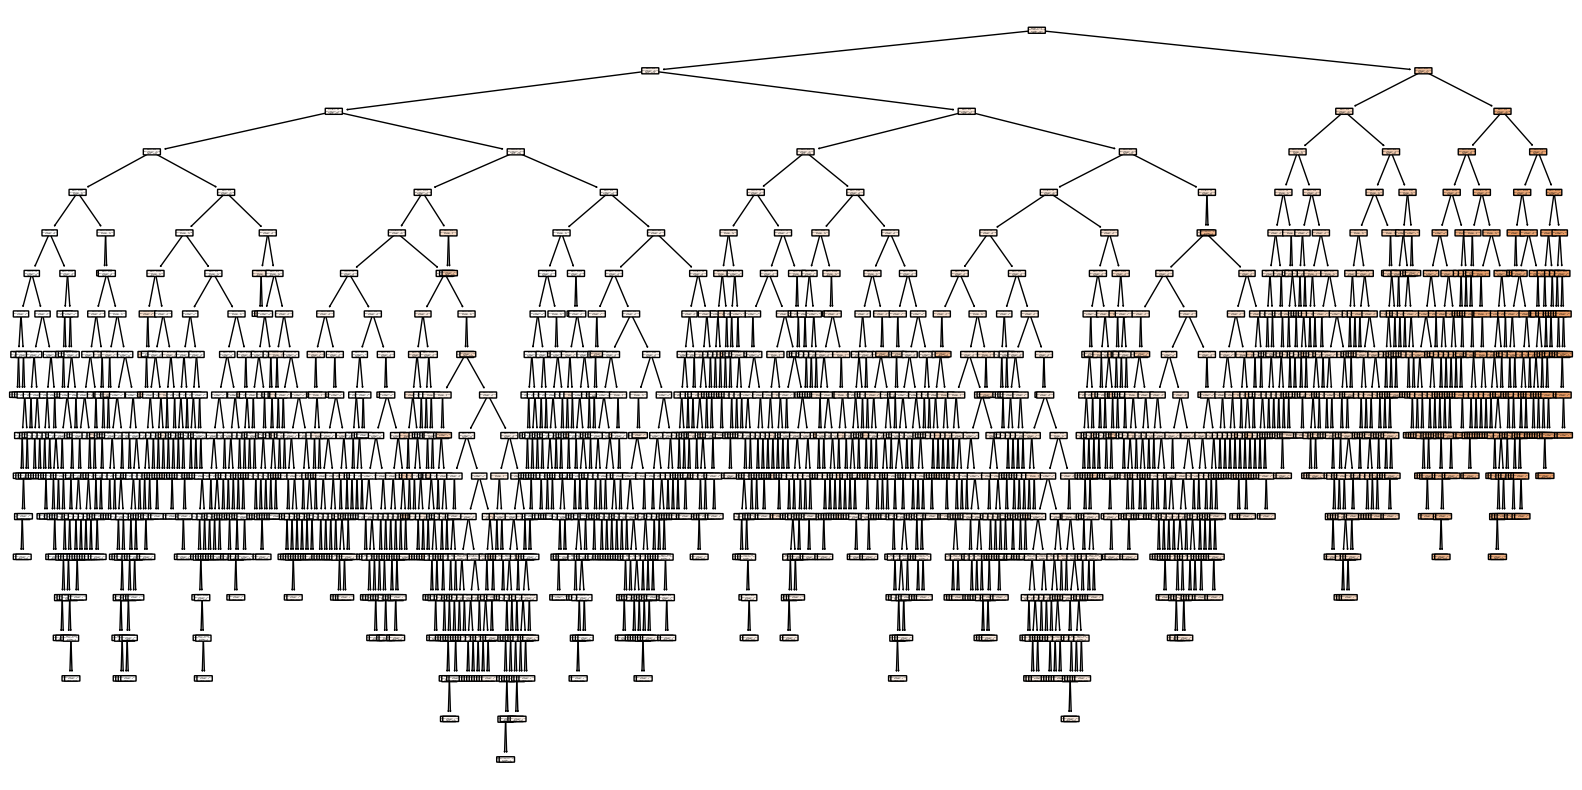

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(decision_tree=dt_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

### RANDOM FOREST TREES

Random Forest has many decision trees.

Here, you visualize one tree to understand how the forest decides.

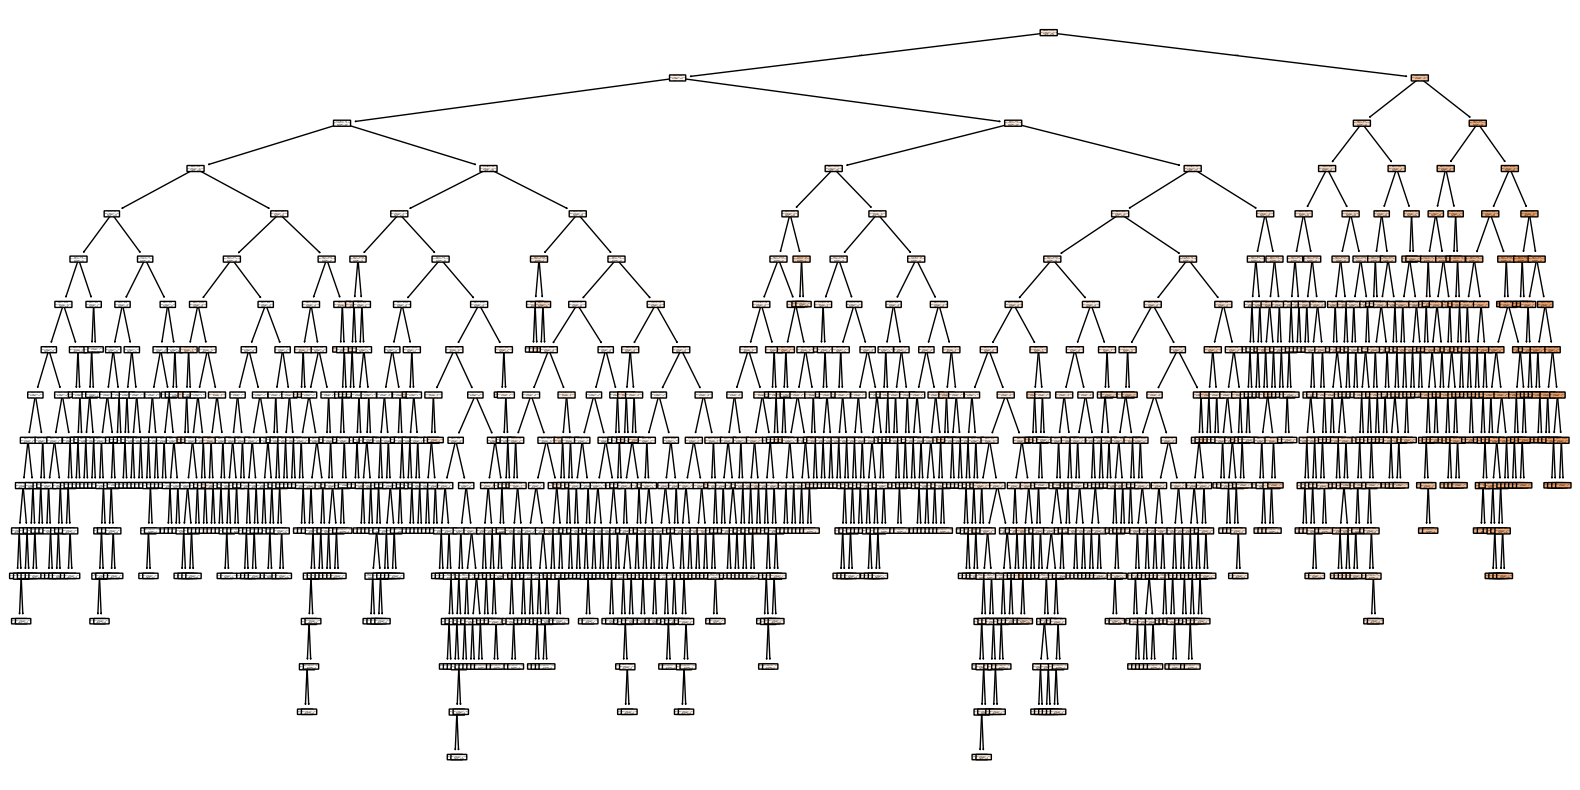

In [32]:
tree_index = 0
single_tree = rfr_model.estimators_[tree_index]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

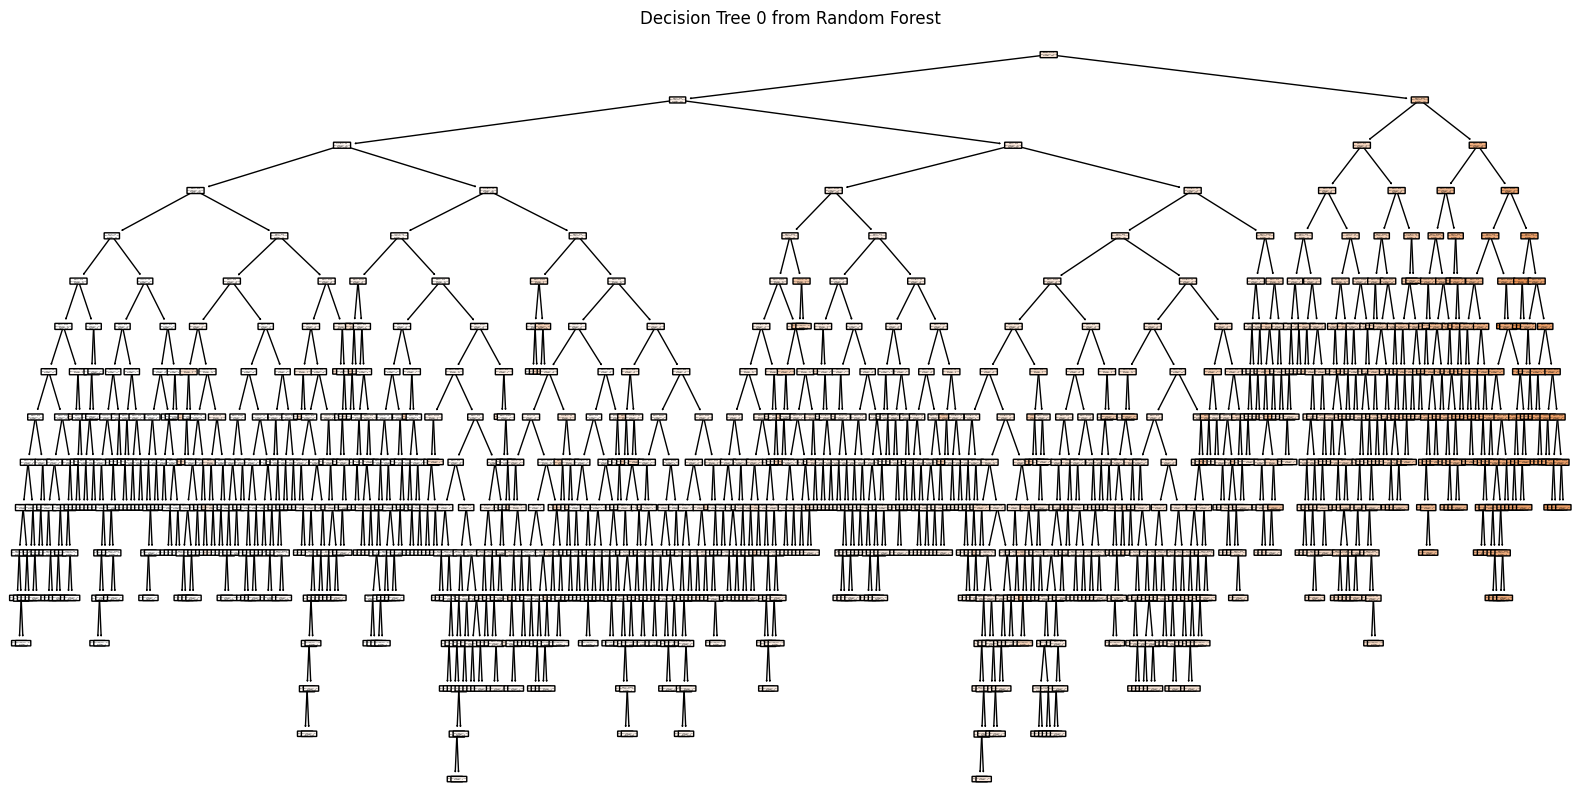

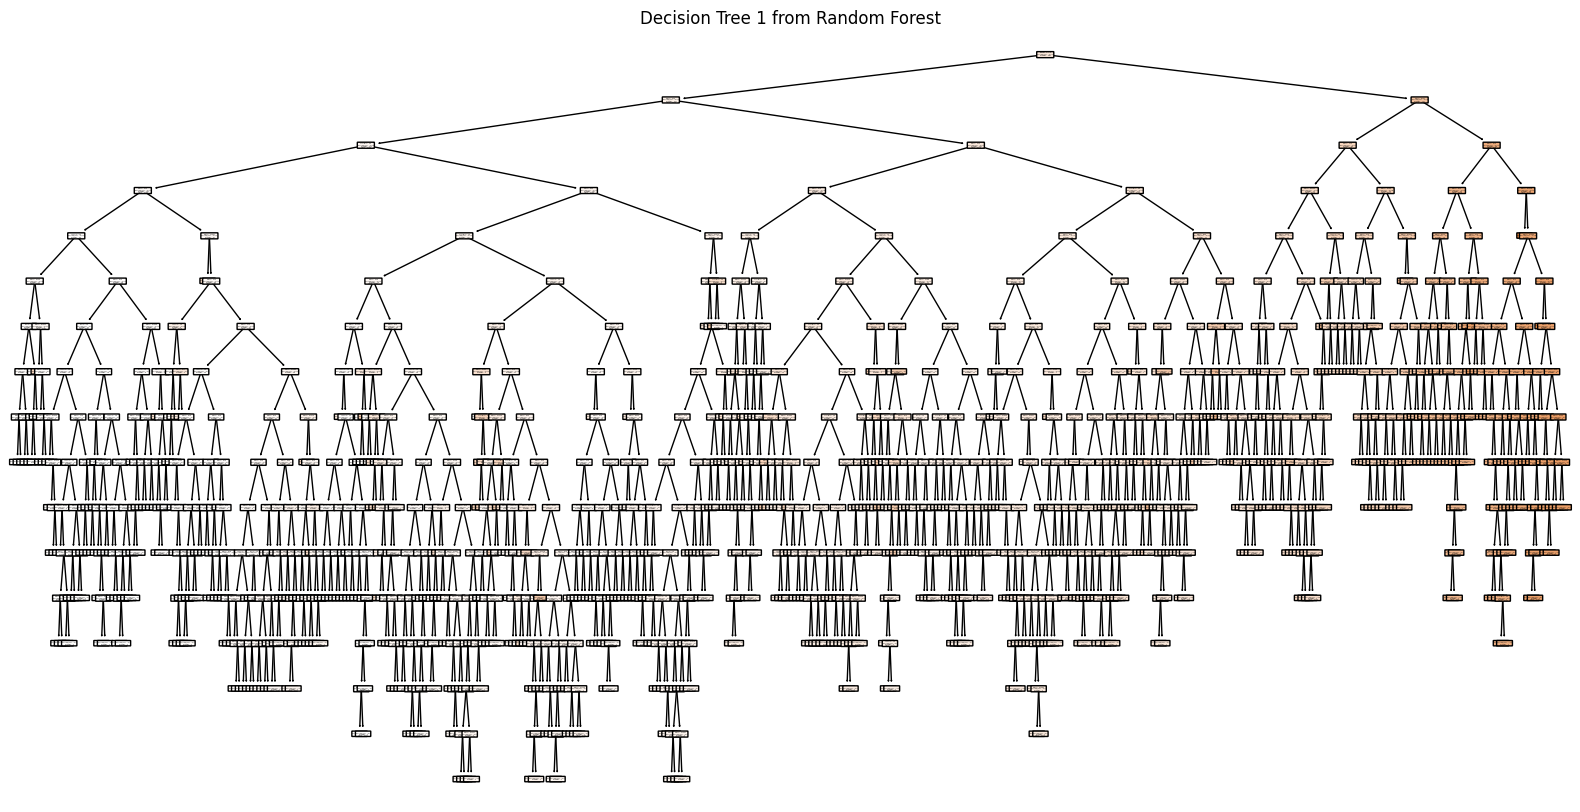

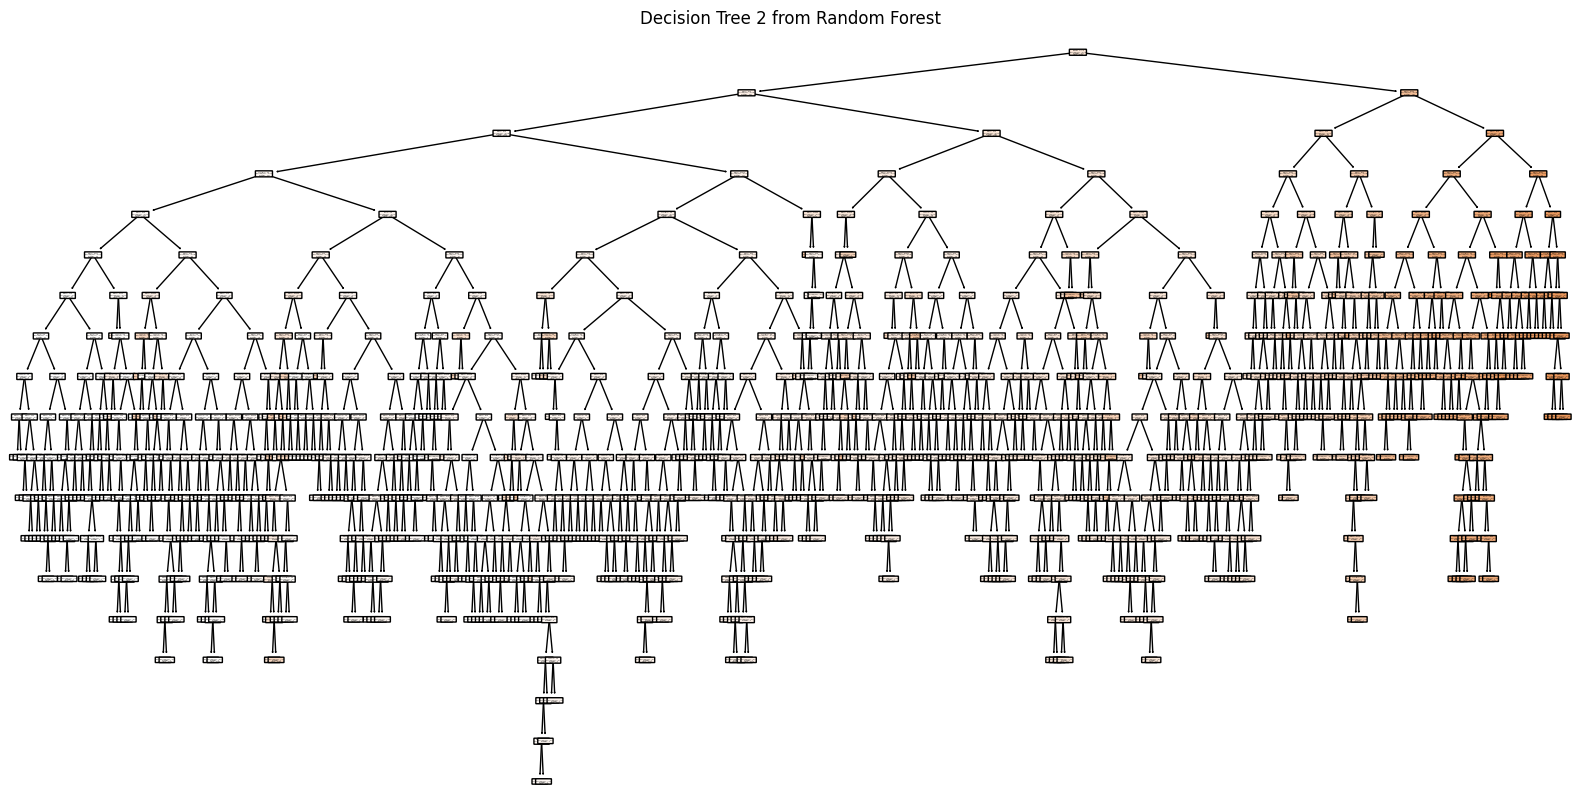

In [22]:
# Shows first 3 trees → demonstrates model diversity.
for tree_index in range(3):
    single_tree = rfr_model.estimators_[tree_index]
    plt.figure(figsize=(20, 10))
    plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree {tree_index} from Random Forest")
    plt.show()


### FEATURE IMPORTANCE

In [23]:
def plot_feature_importance(model, feature_names, model_name):
    feature_importance = pd.DataFrame(model.feature_importances_, index=feature_names, columns=["Importance"])
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', legend=False, color='skyblue')
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1000x600 with 0 Axes>

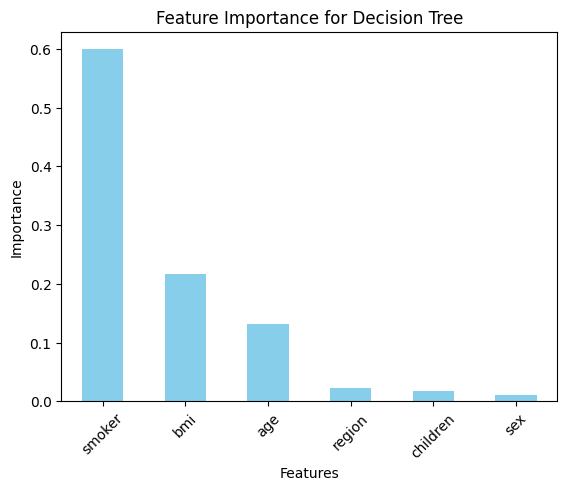

<Figure size 1000x600 with 0 Axes>

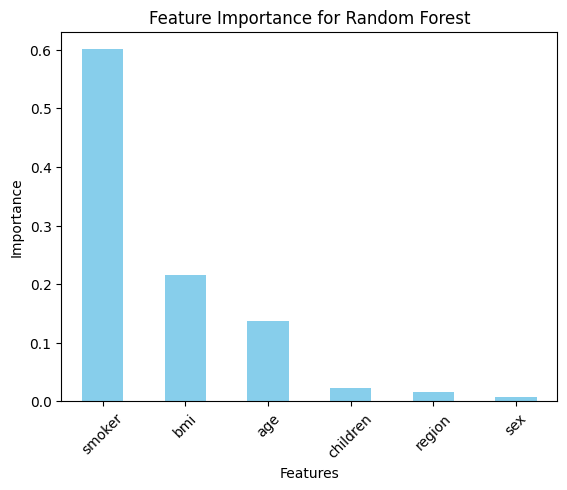

<Figure size 1000x600 with 0 Axes>

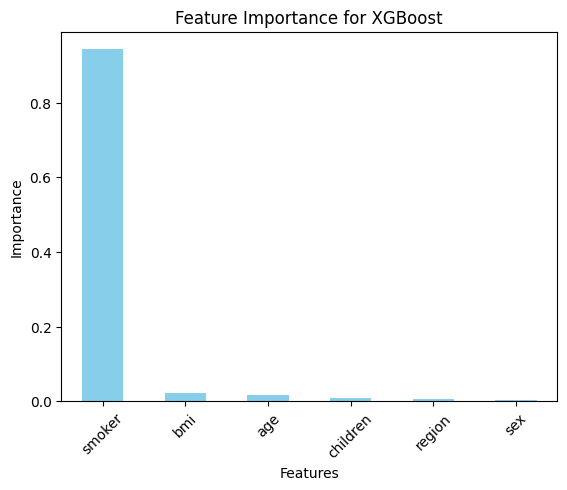

In [24]:
# Compares which features matter most across different models.

plot_feature_importance(dt_model, X_train.columns, "Decision Tree")
plot_feature_importance(rfr_model, X_train.columns, "Random Forest")
plot_feature_importance(xgb_model, X_train.columns, "XGBoost")

### HYPERPARAMETER TUNING

In [33]:
# Hyperparameters control HOW a model learns.
# GridSearchCV tests many combinations to find the best performing model.
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

GridSearchCV tries every combination in param_grid.

cv=5 → performs 5-fold cross-validation.

scoring='r2' → selects the model with highest R².

In [26]:
# Initialize the RandomForestRegressor
# rfr_model = RandomForestRegressor(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [34]:
# Shows the winning model settings + performance.
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best R-squared Score: {grid_search.best_score_}")

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best R-squared Score: 0.8363203827569239


### APPLYING BEST MODEL

You retrain the best model and evaluate it again on the test set.

In [28]:
# Train the model using the best parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_rfr_model = grid_search.best_estimator_

# Fit the best model on the training data
best_rfr_model.fit(X_train, y_train)

# Make predictions and evaluate the performance
y_pred_best = best_rfr_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the results
print(f"MAE: {mae_best}, MSE: {mse_best}, R2: {r2_best}")


MAE: 0.038861938891393236, MSE: 0.004786376584372034, R2: 0.8977678981793442


Visualizes one decision tree inside the tuned Random Forest.

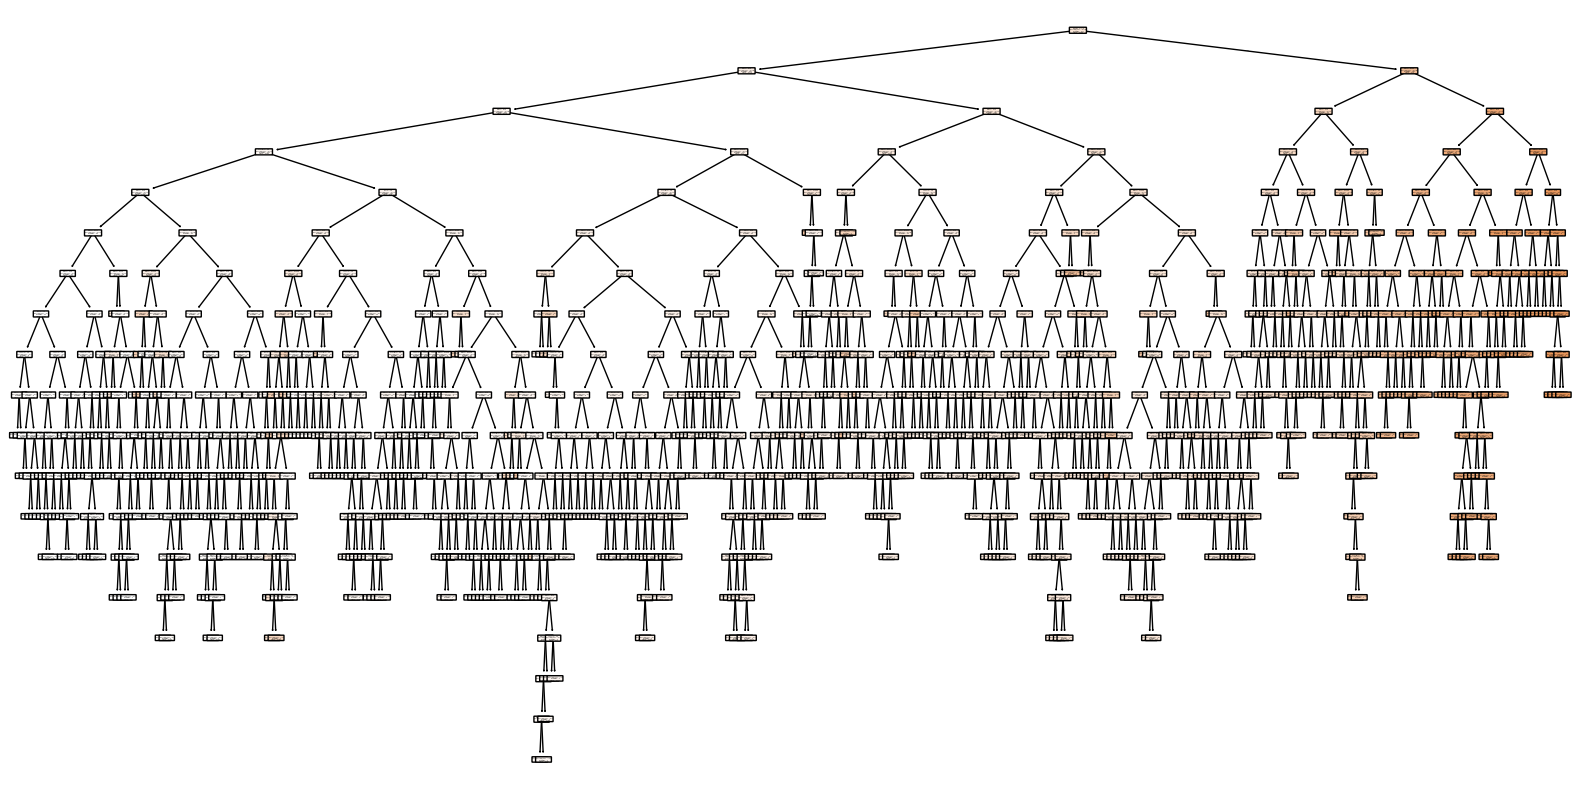

In [29]:
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

### PRINT DECISION RULES

This function prints the actual decision rules the tree uses.

Useful for human interpretation.

In [30]:
from sklearn.tree import _tree

# Extract the best Random Forest model from GridSearchCV
best_rfr_model = grid_search.best_estimator_

# Extract a single decision tree from the Random Forest
tree_index = 0  # Index of the tree to visualize
single_tree = best_rfr_model.estimators_[tree_index]

# Function to display the decision tree criteria
def print_tree_criteria(tree, feature_names):
    # Access the tree structure
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"Node {node}: {name} <= {threshold:.2f}")
            recurse(tree_.children_left[node])
            print(f"Node {node}: {name} > {threshold:.2f}")
            recurse(tree_.children_right[node])
        else:
            print(f"Leaf node {node}: Predicted value {tree_.value[node]}")

    recurse(0)  # Start from the root node

# Print the criteria for each split in the selected tree
print_tree_criteria(single_tree, X_train.columns)

Node 0: smoker <= 0.50
Node 1: age <= 42.50
Node 2: children <= 0.50
Node 3: age <= 22.50
Node 4: sex <= 0.50
Node 5: bmi <= 37.80
Node 6: bmi <= 33.59
Node 7: region <= 1.50
Node 8: bmi <= 27.03
Leaf node 9: Predicted value [[0.02295497]]
Node 8: bmi > 27.03
Leaf node 10: Predicted value [[0.01734797]]
Node 7: region > 1.50
Node 11: age <= 19.50
Leaf node 12: Predicted value [[0.00872358]]
Node 11: age > 19.50
Leaf node 13: Predicted value [[0.01240026]]
Node 6: bmi > 33.59
Leaf node 14: Predicted value [[0.05333281]]
Node 5: bmi > 37.80
Leaf node 15: Predicted value [[0.00970866]]
Node 4: sex > 0.50
Node 16: region <= 1.50
Node 17: age <= 20.50
Node 18: region <= 0.50
Leaf node 19: Predicted value [[0.0096418]]
Node 18: region > 0.50
Leaf node 20: Predicted value [[0.00837147]]
Node 17: age > 20.50
Leaf node 21: Predicted value [[0.0153035]]
Node 16: region > 1.50
Node 22: age <= 18.50
Leaf node 23: Predicted value [[0.00035904]]
Node 22: age > 18.50
Leaf node 24: Predicted value [[0

This means:

If a person is:

non-smoker

younger than 42

has no children

younger than 22

sex encoded as female

BMI low
➡️ The model predicts about 0.02295 (scaled).

So this tree is basically learning:

“Young, non-smoker, low BMI → very low medical cost"

'''
Node 0: smoker > 0.50
Node 180: bmi <= 30.01
Node 181: age <= 46.00
Node 182: age <= 29.50
Node 183: bmi <= 23.20
Leaf node 184: Predicted value [[0.22224]]
'''

If a person is:

smoker

BMI ≤ 30

age ≤ 46

age ≤ 29

BMI ≤ 23

Then predicted cost ≈ 0.22224 (scaled).

This is 10x larger than the earlier non-smoker leaf (~0.02).
This means the tree learned:

“Smokers, even young ones, cost MUCH more.”